**Name**:Sakshi Patil

**UID**:2021300096

**Class**:BE Comps

# Dataset

View the dataset at this link: [https://www.kaggle.com/datasets/nishanthsalian/socioeconomic-country-profiles](https://www.kaggle.com/datasets/nishanthsalian/socioeconomic-country-profiles)

# Description

This dataset provides a comprehensive overview of socioeconomic conditions in 66 countries. With 95 diverse indicators, it paints a detailed picture of each country across various domains.  Beyond basic information, it includes key economic measures like GDP and inflation, social indicators such as life expectancy and education levels, environmental data, military spending, healthcare statistics, and trade figures. This dataset offers a valuable resource for analyzing and comparing socioeconomic factors across a diverse range of nations.


In [30]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('soci_econ_country_profiles.csv')

# Inspect the data
df.head()

,Unnamed: 0,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),...,"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,...,NaN,79.726,72.924,76.372000,0.856138,22572521.0,21472290.0,10.955501,12.929913,91.749
1,1,Australia,Oceania,7692060,24451,3.2,99.3,1230859,2.4,51352.2,...,1.948647,84.600,80.500,82.500000,2.007966,12349632.0,12252228.0,21.915859,64.110306,85.904
2,2,Austria,WesternEurope,83871,8736,106.0,96.2,376967,1.0,44117.7,...,2.081269,84.000,79.400,81.643902,0.756179,4478340.0,4319226.0,25.355237,27.024073,58.094
3,3,Belarus,EasternEurope,207600,9468,46.7,87.0,54609,-3.9,5750.8,...,6.031837,79.200,69.300,74.129268,1.162417,5077542.0,4420722.0,13.019006,2.933101,78.134
4,4,Belgium,WesternEurope,30528,11429,377.5,97.3,455107,1.5,40277.8,...,2.125971,83.900,79.200,81.492683,0.910371,5766141.0,5609017.0,23.399721,33.727746,97.961


## Word Cloud

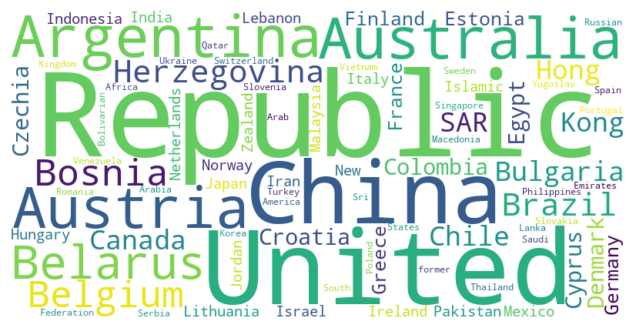

In [17]:
text = ' '.join(df['country'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


The word cloud appears to visualize the frequency of countries mentioned in some dataset. "Republic", "United", and "China" are the most prominent words, indicating they are likely the most frequent values.

## Box Plot

In [18]:
fig = px.box(df, x="Region", y="CO2 emission estimates (million tons/tons per capita)", title="Box Plot: Region vs. CO2 Emissions")
fig.show()


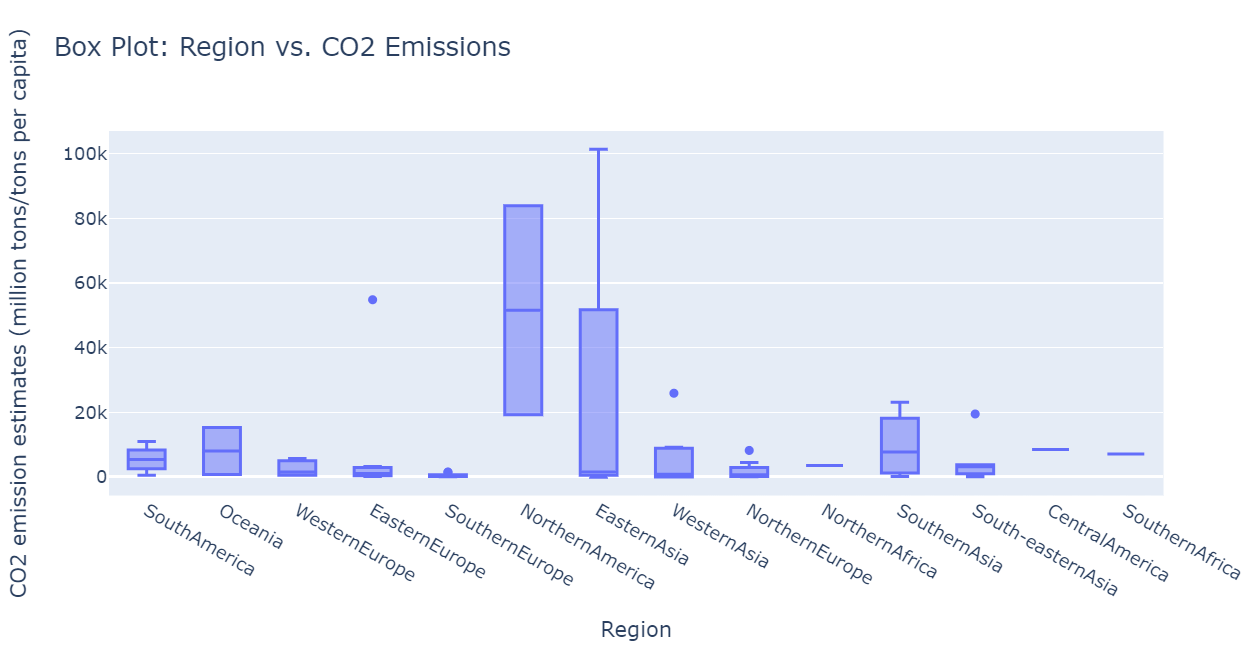


This box plot compares CO2 emissions per capita across different world regions. Northern America has the highest median emissions, with a wide range and some extreme outliers. Eastern Asia also shows high emissions, but with less variability.  Regions like South America, Oceania, and Africa have significantly lower CO2 emissions per capita.

## Violin Plot


In [19]:
fig = px.violin(df, x="Region", y="Life expectancy at birth, total (years)", title="Violin Plot: Region vs. Life Expectancy")
fig.show()


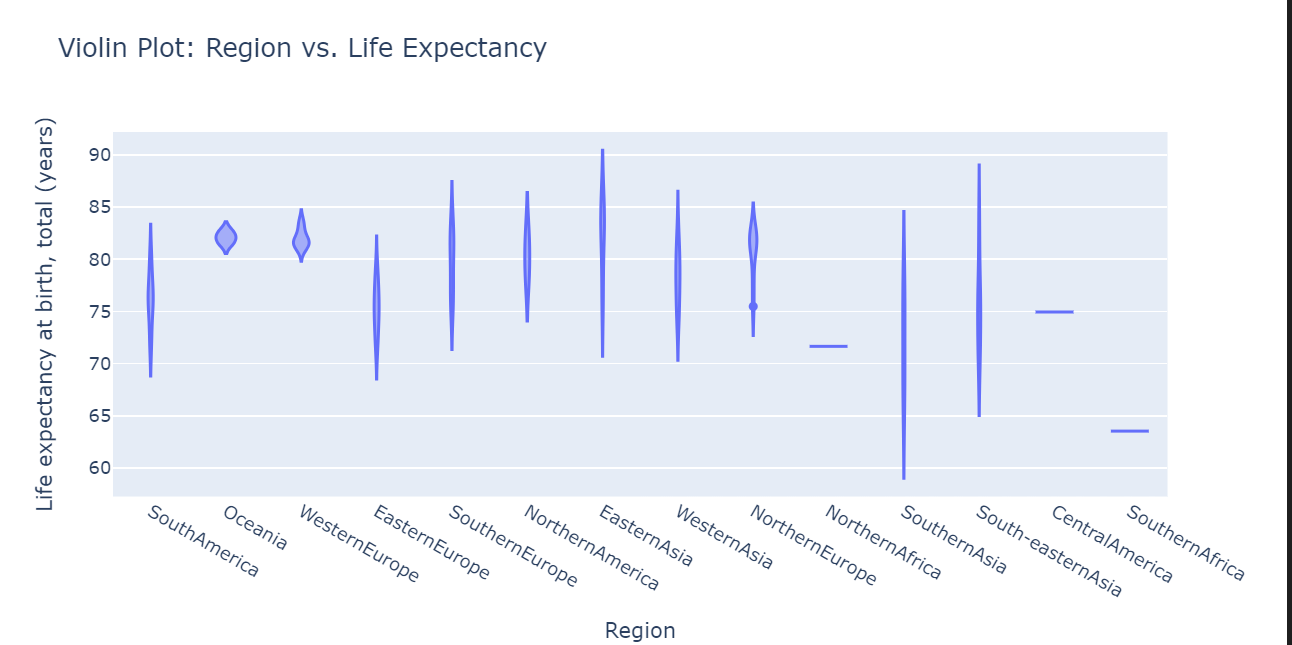

This violin plot illustrates the distribution of life expectancy across different regions. Eastern Asia and Northern America generally have the highest life expectancies, while Southern Africa and Central America have the lowest.  The wider sections of the "violins" indicate a greater density of data points at that life expectancy value.

## Linear Regression Plot


In [20]:
fig = px.scatter(df, x="Population in thousands (2017)", y="GDP per capita (current US$)", trendline="ols", title="Linear Regression Plot")
fig.show()


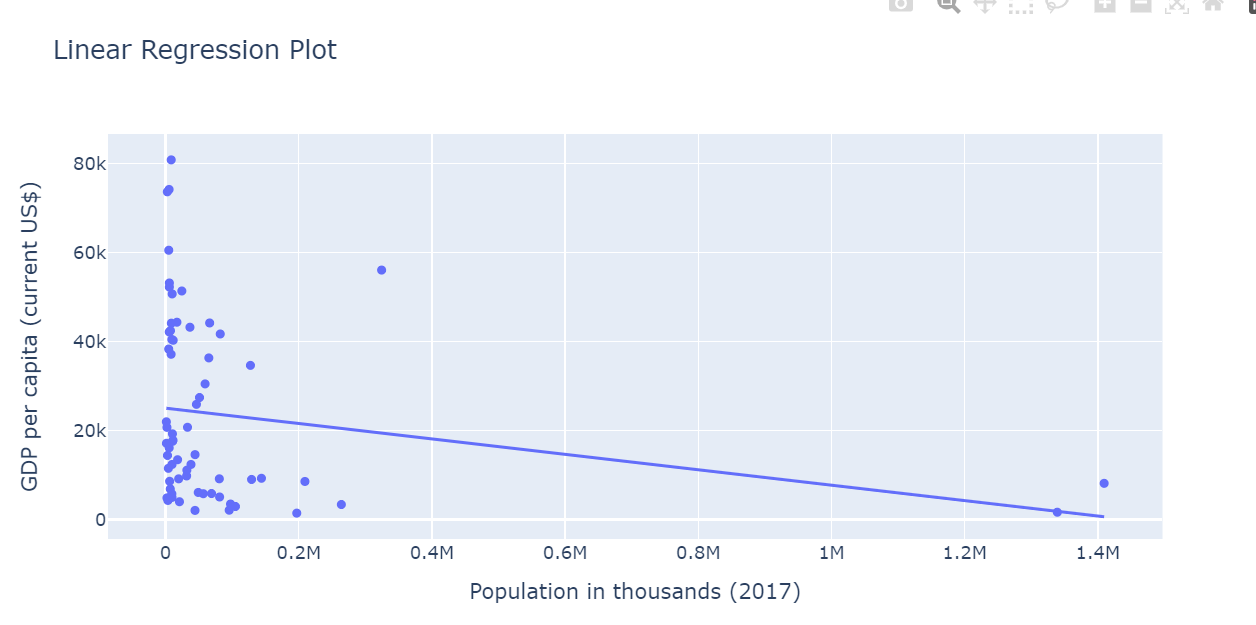

This plot explores the relationship between population and GDP per capita using a linear regression model. The downward sloping line suggests a negative correlation: as population increases, GDP per capita tends to decrease. However, the scattered data points and the relatively flat line indicate a weak linear relationship.


## Nonlinear Regression Plot

In [21]:
fig = px.scatter(df, x="Population in thousands (2017)", y="GDP per capita (current US$)", trendline="lowess", title="Nonlinear Regression Plot")
fig.show()


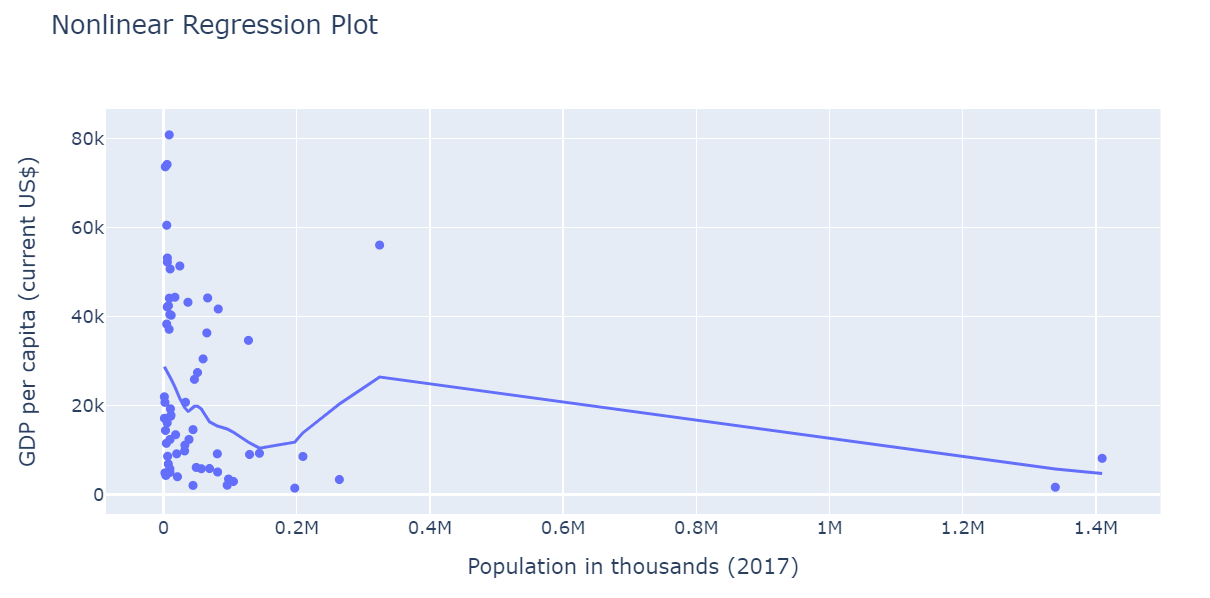


This plot also investigates the relationship between population and GDP per capita, but using a nonlinear regression model. The curved line captures a more complex relationship, suggesting that the impact of population on GDP per capita may not be linear.  The model hints at a potential decline in GDP per capita with initial population increases, followed by a more gradual decrease.


## 3D Scatter Plot


In [22]:
fig = px.scatter_3d(df, x='Population in thousands (2017)', y='GDP growth rate (annual %, const. 2005 prices)', z='GDP per capita (current US$)', color='country', title="3D Scatter Plot")
fig.show()


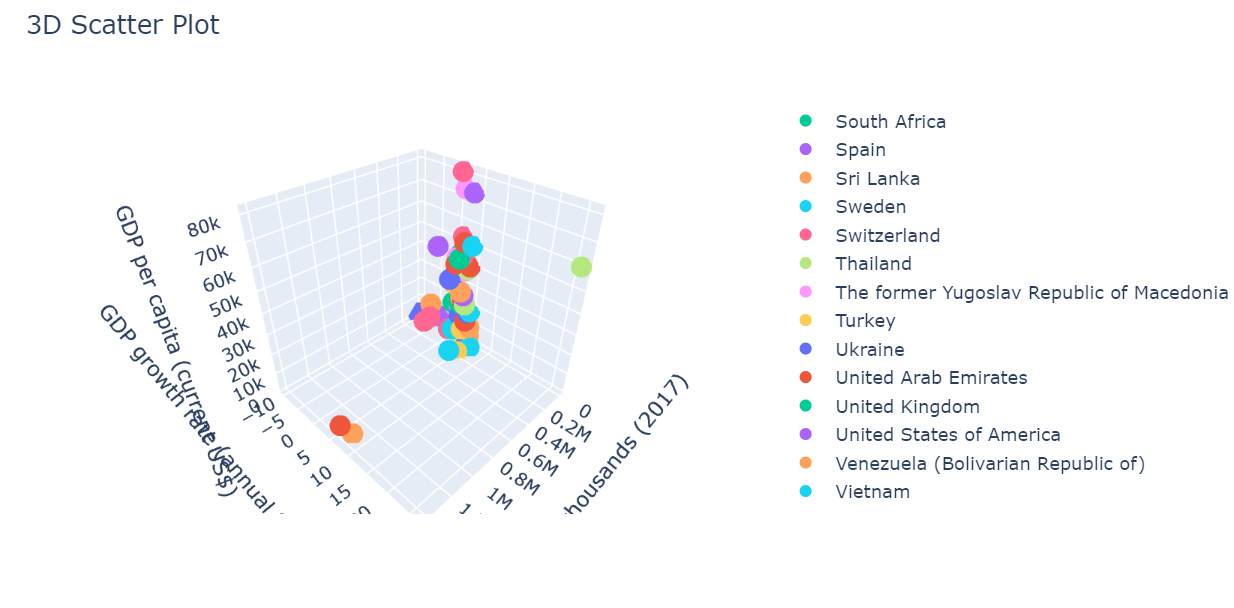

This 3D scatter plot visualizes the relationship between GDP per capita, GDP growth rate, and population. Each point represents a country, and the color coding allows for comparisons between countries.  The plot suggests complex interactions between these three variables, with no clear linear trends readily apparent. It appears that countries with higher population may tend towards lower GDP per capita, while the relationship with GDP growth rate is less clear.

## Jitter Plot

In [23]:
import plotly.express as px
import numpy as np

region_map = {region: i for i, region in enumerate(df['Region'].unique())}
df['Region_index'] = df['Region'].map(region_map)

df['Region_jitter'] = df['Region_index'] + np.random.uniform(-0.2, 0.2, size=len(df))

fig = px.strip(df, x='Region_jitter', y='GDP per capita (current US$)', title="Jitter Plot: Region vs. GDP per capita", hover_name='Region')

fig.update_xaxes(tickvals=list(region_map.values()), ticktext=list(region_map.keys()))

fig.show()


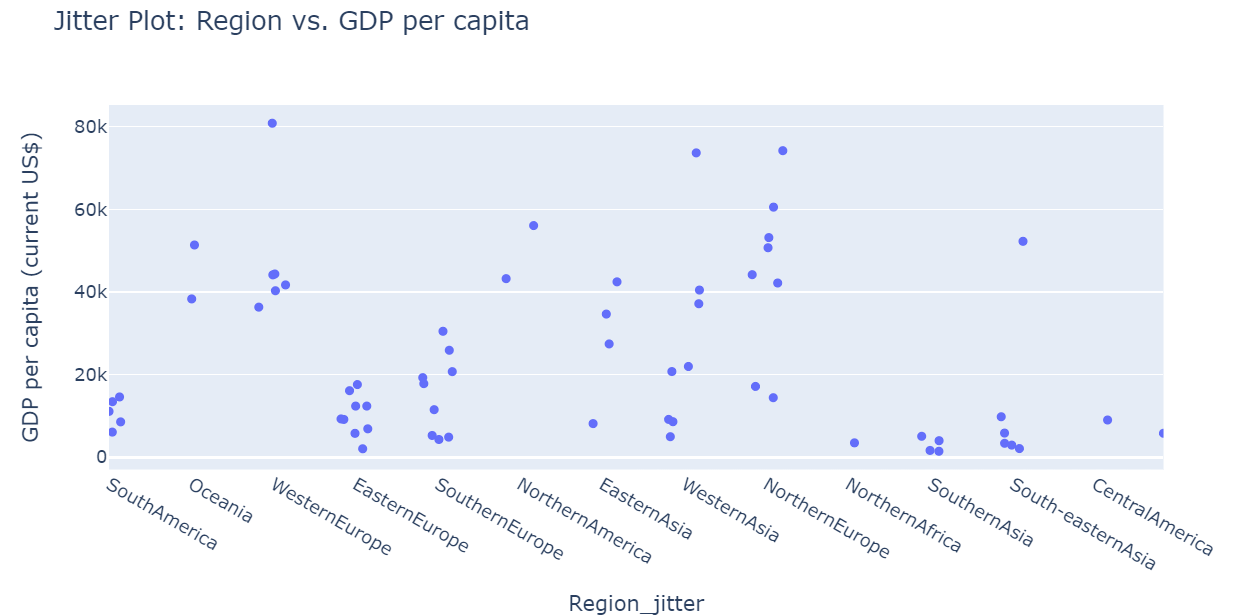

This jitter plot displays the distribution of GDP per capita across different regions. The jittering helps to visualize the density of data points within each region.  Western Europe and Northern America appear to have generally higher GDP per capita with some outliers, while South Asia and Southern Africa tend to have lower values.  The spread within each region suggests varying levels of economic development.


## Line Plot

In [24]:
fig = px.line(df, x="country", y="GDP per capita (current US$)", title="Line Plot of GDP per capita")
fig.show()




This line plot shows the trend of GDP per capita across different countries. The x-axis represents countries (though difficult to read due to the number), and the y-axis shows GDP per capita. The fluctuating line indicates significant variation in GDP per capita across these countries.  It highlights the economic disparities between different nations.


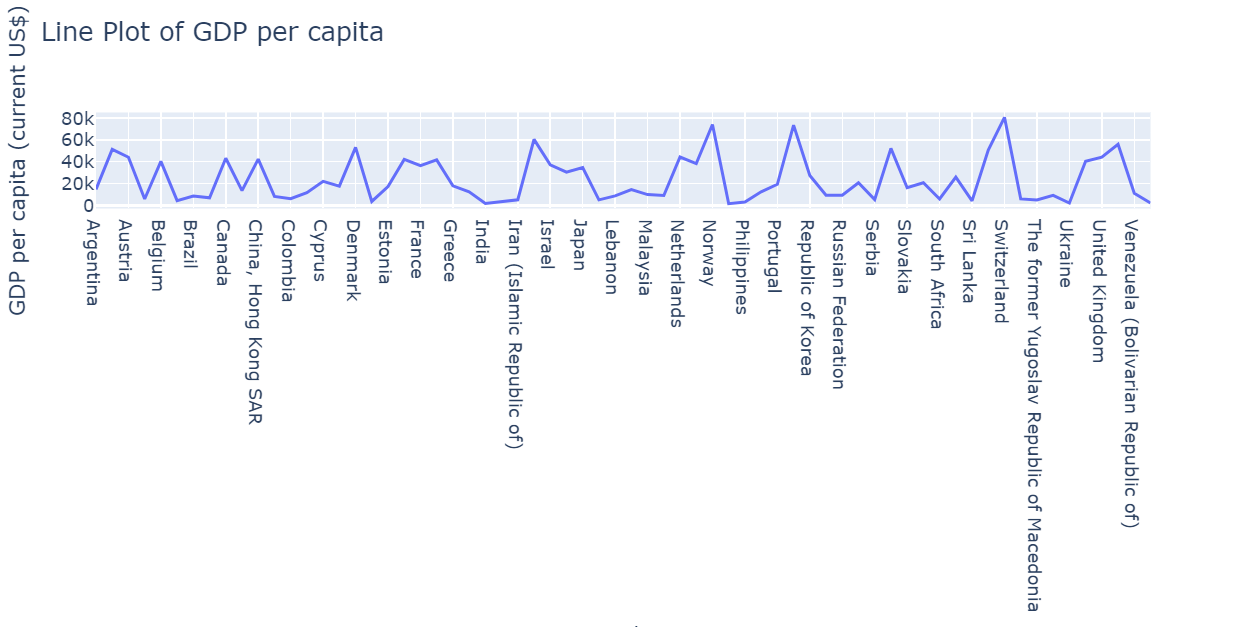

## Area Plot

In [25]:
fig = px.area(df, x="country", y="GDP per capita (current US$)", title="Area Plot of GDP per capita")
fig.show()




This area plot is similar to the line plot, also depicting GDP per capita across countries. The filled area under the line emphasizes the cumulative value of GDP per capita.  Like the line plot, it shows considerable variation in GDP per capita between countries. The area plot may be slightly better at highlighting the overall magnitude of GDP per capita across all countries.


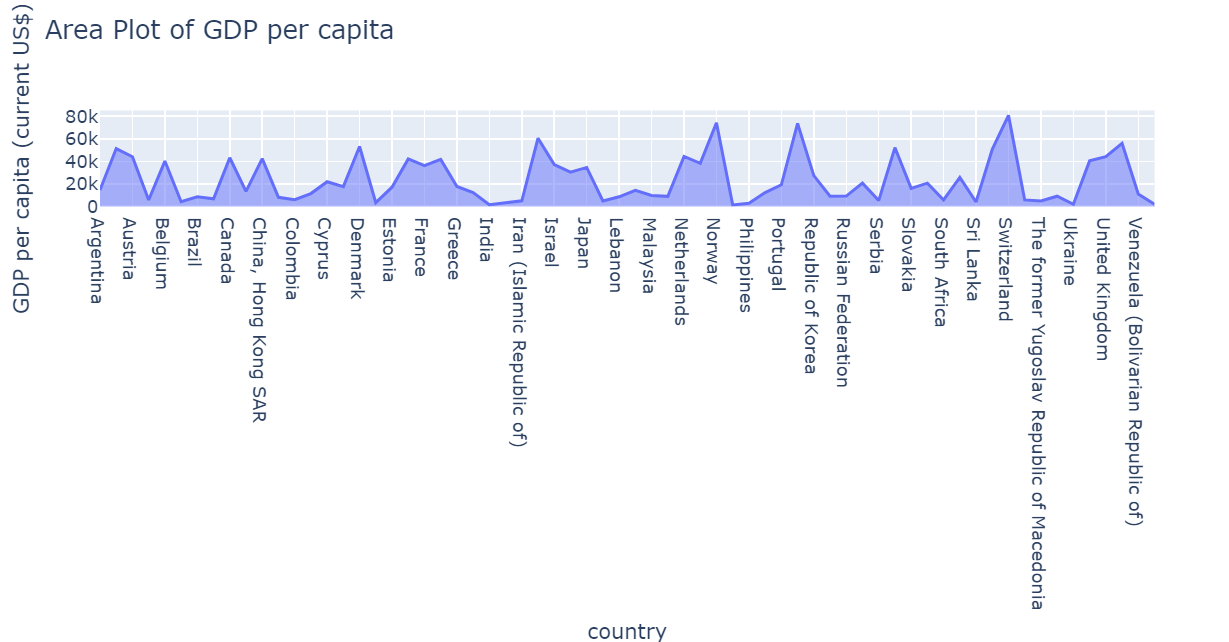

## Waterfall Chart

In [26]:
import plotly.graph_objects as go

regions = df['Region'].unique()
gdp_values = [df[df['Region'] == region]['GDP: Gross domestic product (million current US$)'].sum() for region in regions]

fig = go.Figure()

fig.add_trace(go.Waterfall(
    name="GDP by Region",
    orientation="v",
    measure=["relative"] * len(regions),
    x=regions,
    y=gdp_values,
    connector={"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(title="Waterfall Chart: GDP by Region",
                  xaxis_title="Region",
                  yaxis_title="GDP (Million US$)")
fig.show()




This waterfall chart shows the cumulative GDP across different regions. Each bar represents a region, and the green color indicates positive contributions to the total GDP.  Eastern Asia appears to have the largest contribution, followed by Western Asia and Northern Europe. This chart effectively visualizes the relative economic size of different regions.


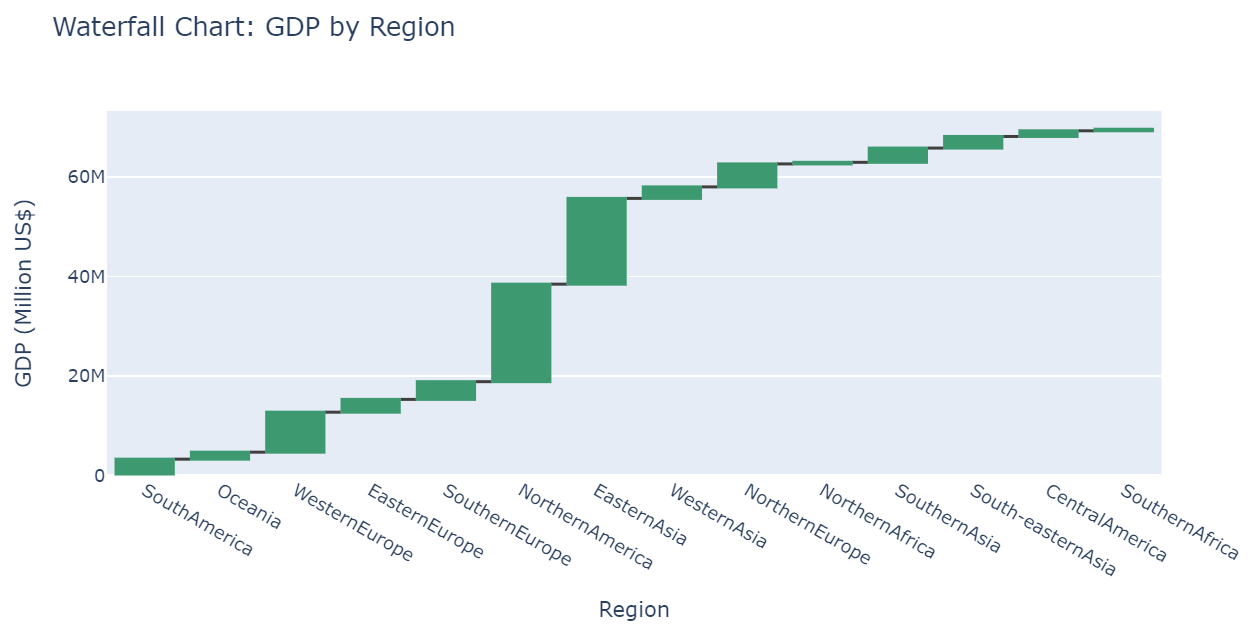

## Donut Chart


In [27]:

region_population = df.groupby('Region')['Population in thousands (2017)'].sum().reset_index()

fig = px.pie(region_population, names='Region', values='Population in thousands (2017)',
             title="Donut Chart: Population Distribution by Region", hole=0.4)

fig.update_layout(
    title="Donut Chart: Population Distribution by Region",
    xaxis_title="",
    yaxis_title="",
    showlegend=True
)

fig.show()


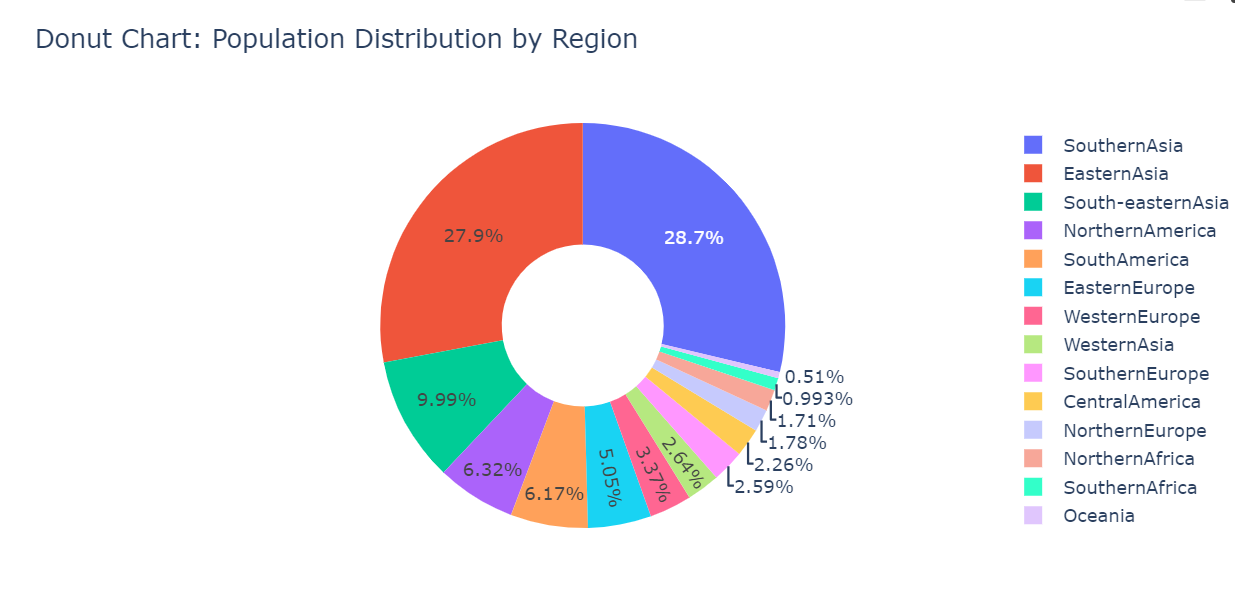

This donut chart illustrates the distribution of the world population across different regions. Eastern Asia has the largest share, followed by South-eastern Asia and Southern Asia.  Smaller regions like Oceania and Central America have comparatively smaller population percentages.  The hole in the center of the chart allows for displaying additional information or simply for aesthetic purposes.

## Treemap

In [28]:
country_exports = df.groupby('country')['International trade: Exports (million US$)'].sum().reset_index()

fig = px.treemap(country_exports, path=['country'], values='International trade: Exports (million US$)',
                 title="Treemap: Exports Distribution by Country")

fig.update_layout(title="Treemap: Exports Distribution by Country")
fig.show()


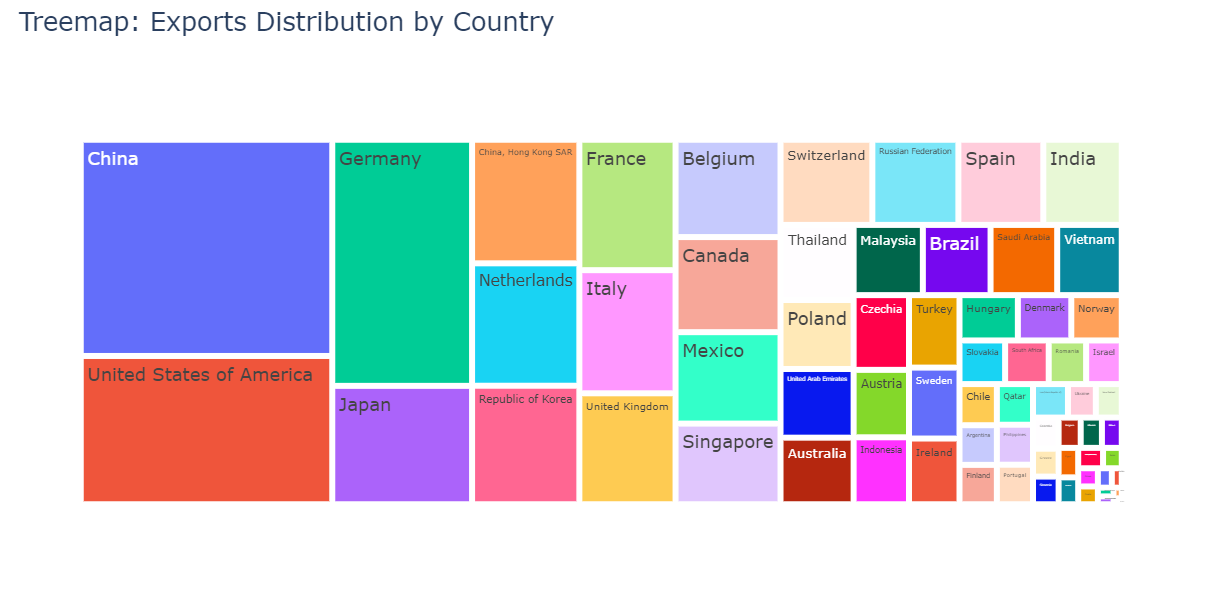

This treemap visualizes the distribution of exports by country. The size of each rectangle corresponds to the export volume of that country. China has the largest share of exports, followed by the United States and Germany.  The color-coding helps to distinguish different countries and their relative export contributions.

## Funnel Chart

In [29]:
funnel_data = df.groupby('Region')['Unemployment (% of labour force)'].mean().reset_index()

funnel_data = funnel_data.sort_values(by='Unemployment (% of labour force)', ascending=False)

fig = px.funnel(funnel_data, x='Unemployment (% of labour force)', y='Region',
                title="Funnel Chart: Unemployment Distribution by Region")

fig.update_layout(title="Funnel Chart: Unemployment Distribution by Region")
fig.show()


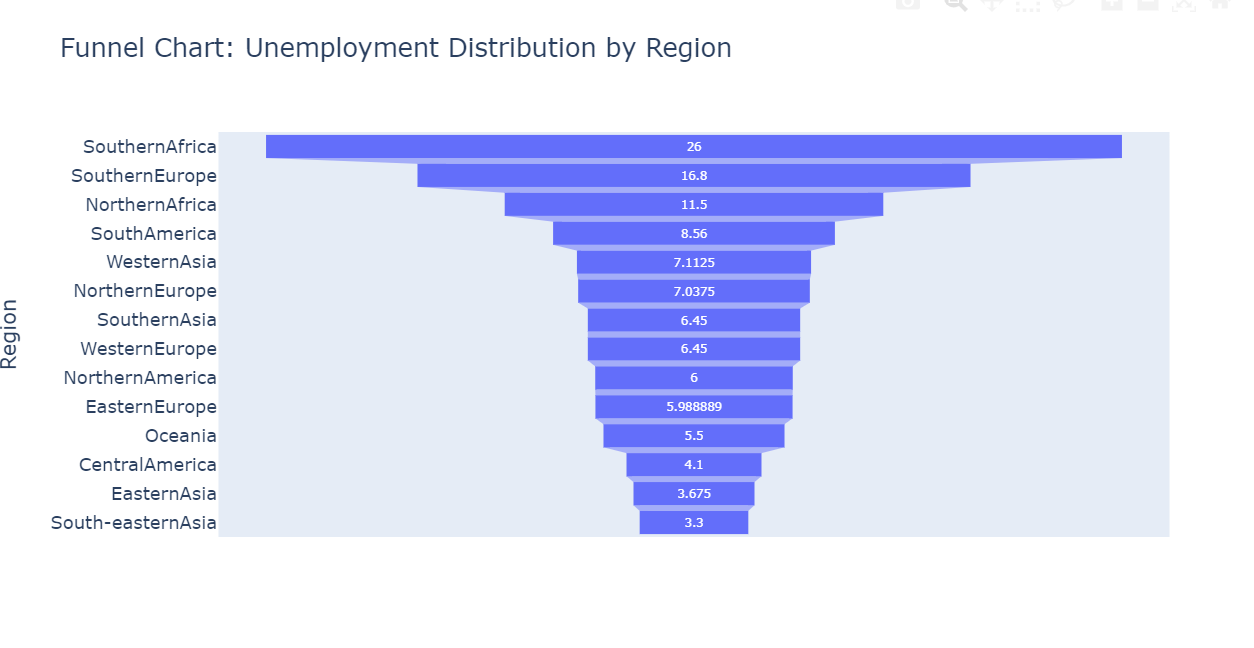



This funnel chart presents the distribution of unemployment across regions.  The widest part at the top represents the region with the highest unemployment (Southern Africa), and it gradually narrows down to the region with the lowest unemployment (South-eastern Asia).  The chart effectively highlights the decreasing trend of unemployment across the listed regions.